# Part 2 - First Visit Constant-$\alpha$ GLIE MC Control Algorithm (11) Explained

## This algorithm have 4 main parts;
* ```MC Control``` - We initialise $Q$, create a variable ```nA``` for all possible actions, apply epsilon to all episodes
* ```gen_eps_from_Q``` - We generate an ```episode```, have the agent randomly choose an ```action``` based on the policy and returns an ```episode``` as a tuple of $S_t, A_t, R_{t+1}$
* ```get_probs``` - Take the $\epsilon$ and generate the policy to be used in ```gen_eps_from_Q```
* ```update_Q``` - apply $\gamma$ (discount) to all rewards and then update $Q$ with $\alpha$ • $G_t$ • $\gamma$ 

In [1]:
import sys
import gym
#gymspaces aren't imported by default anymore
import gym.spaces
import numpy as np
from collections import defaultdict

env = gym.make('Blackjack-v0')
from plot_utils import plot_blackjack_values, plot_policy

Again Blackjack has 3 components to it's **States (s)** and hence ```s``` can be considered **a 3-tuple** of; 

* The players card sum between 0 and 31
```∈{0,1,…,31}```

* The dealers current face up card between 1 and 10
```∈{1,…,10}```

* Whether or not the player has a usable ace 
```no = False, yes = True```



The agent has two available **Actions (A)**;

```stick = 0 
hit = 1 ```



In [2]:

def mc_control(env, num_episodes, alpha, gamma = 0.871, eps_start = 1.0 , eps_decay = 0.9999, eps_lim = 0.02):
  
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    epsilon = eps_start
    
    for i_episode in range (1, num_episodes+1):
        
        if i_episode % 1000 == 0:
                print("\rEpisode {} of {} completed.".format(i_episode, num_episodes), end = "")
                sys.stdout.flush()
        if i_episode % 100000 == 0:
                states, actions, rewards = zip(*episode)
                print('\nstates: ', states)
                print('\nactions: ', actions)
                print('\nrewards: ', rewards)
                sys.stdout.flush()
      
        epsilon = max(epsilon*eps_decay, eps_lim)
        episode = gen_eps_from_Q(env, Q, epsilon, nA)
        Q = update_Q(env, episode, Q, alpha, gamma)        
    
    policy = dict((a, np.argmax(b)) for a, b in Q.items())
    
    return policy, Q
        
        
    
    

In [3]:
def gen_eps_from_Q(env, Q, epsilon, nA):
    episode = []
    state = env.reset()
    while True:
        action = np.random.choice(np. arange(nA), p = get_probs(Q[state], epsilon, nA)) \
                                        if state in Q else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode
    

In [4]:
def update_Q(env, episode, Q, alpha, gamma):
    
    states, actions, rewards = zip(*episode)
    discounts = np.array([gamma**i for i in range(len(rewards)+1)])
    
    for i, state in enumerate(states):
        old_q = Q[state][actions[i]]
        
        Q[state][actions[i]] = old_q + alpha*(sum(rewards[i:]*discounts[:-(1+i)]) - old_q)
        
        
    return Q

In [5]:
def get_probs(Q_s, epsilon, nA):
    
    policy_s = np.ones(nA) * epsilon / nA
    best_a = np.argmax(Q_s)
    policy_s[best_a] = 1 - epsilon + (epsilon / nA)
    
    return policy_s

In [6]:
# obtain the estimated optimal policy and action-value function
policy, Q = mc_control(env, 500000, 0.02)

Episode 100000 of 500000 completed.
states:  ((13, 10, False), (15, 10, False))

actions:  (1, 1)

rewards:  (0, -1)
Episode 200000 of 500000 completed.
states:  ((12, 1, True), (16, 1, True), (17, 1, True), (12, 1, False), (14, 1, False))

actions:  (1, 1, 1, 1, 1)

rewards:  (0, 0, 0, 0, -1)
Episode 300000 of 500000 completed.
states:  ((17, 9, True), (17, 9, False))

actions:  (1, 0)

rewards:  (0, -1.0)
Episode 400000 of 500000 completed.
states:  ((12, 5, False),)

actions:  (0,)

rewards:  (1.0,)
Episode 500000 of 500000 completed.
states:  ((7, 9, False), (13, 9, False))

actions:  (1, 1)

rewards:  (0, -1)


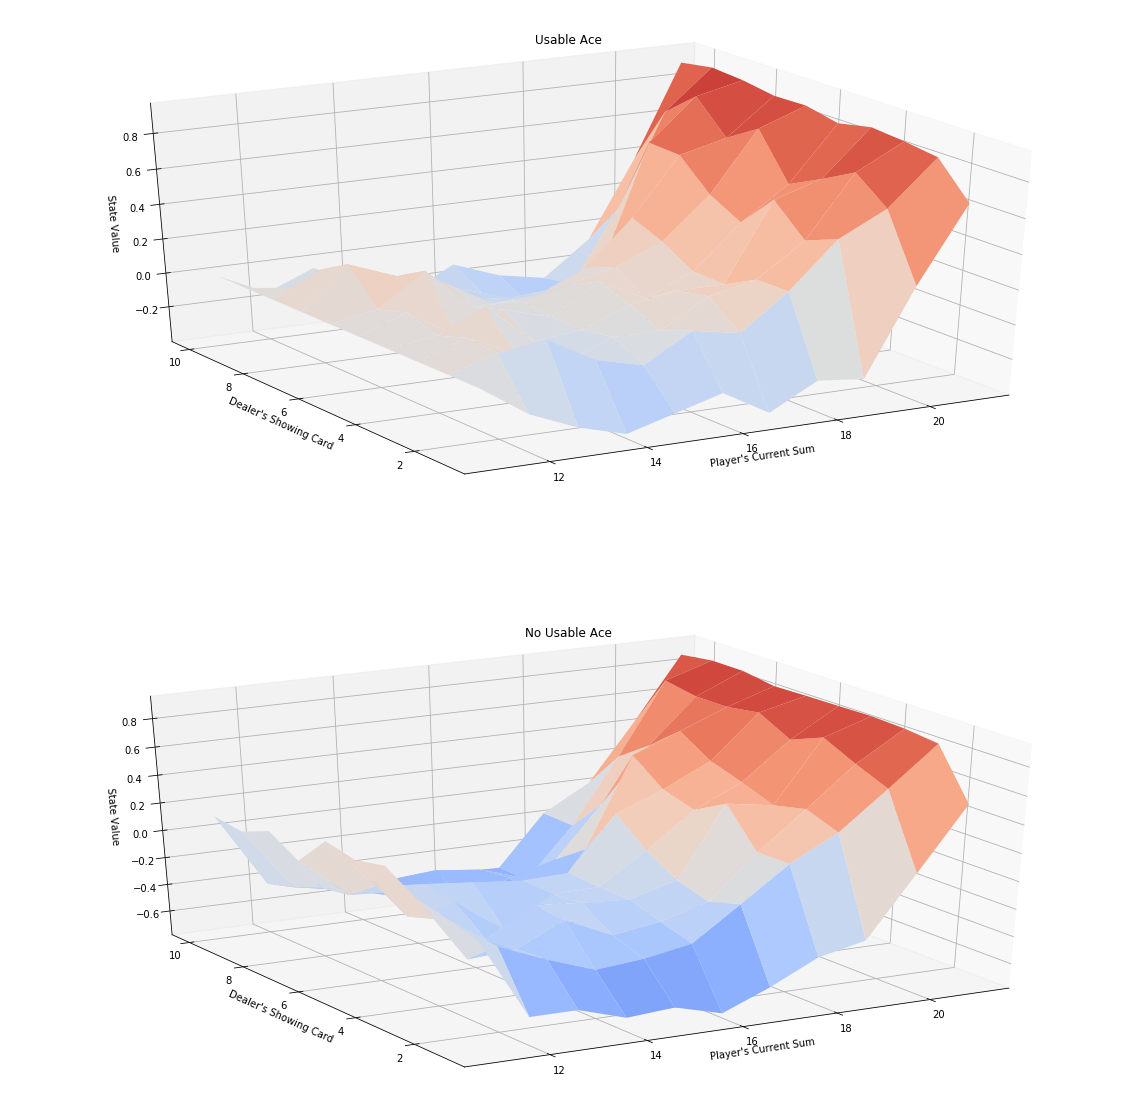

In [7]:
V = dict((k,np.max(v)) for k, v in Q.items())

# plot the state-value function
plot_blackjack_values(V)

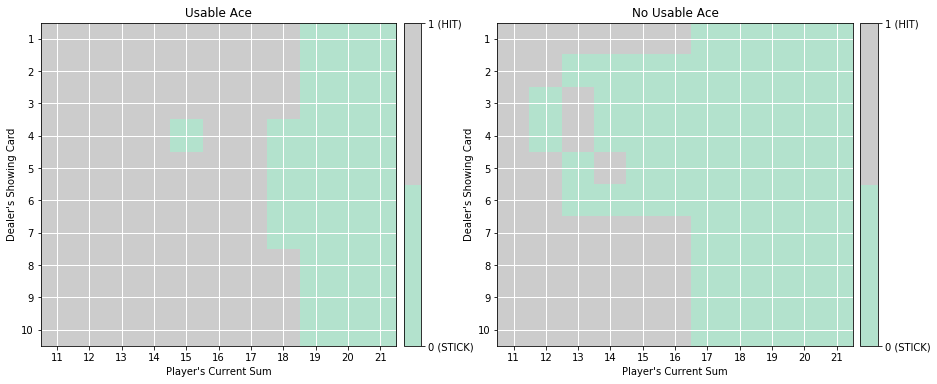

In [8]:
plot_policy(policy)